# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

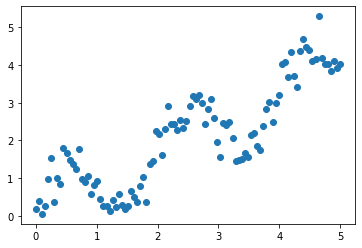

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5134696010002426


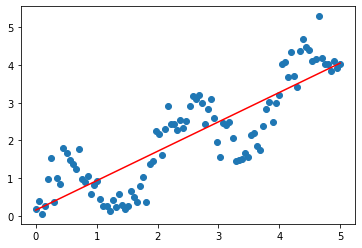

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

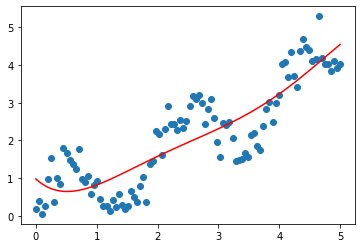

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.46361743  1.96143457 -0.7954785   0.14763319 -0.00991518]
interception:  0.9792237355954376


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.97922374, 0.91020529, 0.85059162, 0.79980195, 0.75727777,
       0.72248245, 0.69490085, 0.67403894, 0.65942337, 0.65060114,
       0.64713915, 0.64862385, 0.65466082, 0.6648744 , 0.67890731,
       0.6964202 , 0.71709133, 0.74061615, 0.76670688, 0.79509218,
       0.8255167 , 0.85774074, 0.8915398 , 0.92670426, 0.96303892,
       1.00036266, 1.03850803, 1.07732085, 1.11665982, 1.15639616,
       1.19641319, 1.23660592, 1.27688071, 1.31715486, 1.35735618,
       1.39742265, 1.43730201, 1.47695138, 1.51633683, 1.55543305,
       1.59422289, 1.63269703, 1.67085356, 1.7086976 , 1.74624088,
       1.78350139, 1.82050296, 1.85727489, 1.89385154, 1.93027196,
       1.96657946, 2.00282126, 2.0390481 , 2.07531381, 2.11167495,
       2.14819042, 2.18492104, 2.22192921, 2.25927845, 2.29703308,
       2.33525779, 2.37401724, 2.4133757 , 2.45339663, 2.49414232,
       2.53567347, 2.57804881, 2.62132471, 2.6655548 , 2.71078955,
       2.75707591, 2.8044569 , 2.85297123, 2.90265289, 2.95353

In [15]:
regr_poly.predict(X_poly)

array([0.97922374, 0.91020529, 0.85059162, 0.79980195, 0.75727777,
       0.72248245, 0.69490085, 0.67403894, 0.65942337, 0.65060114,
       0.64713915, 0.64862385, 0.65466082, 0.6648744 , 0.67890731,
       0.6964202 , 0.71709133, 0.74061615, 0.76670688, 0.79509218,
       0.8255167 , 0.85774074, 0.8915398 , 0.92670426, 0.96303892,
       1.00036266, 1.03850803, 1.07732085, 1.11665982, 1.15639616,
       1.19641319, 1.23660592, 1.27688071, 1.31715486, 1.35735618,
       1.39742265, 1.43730201, 1.47695138, 1.51633683, 1.55543305,
       1.59422289, 1.63269703, 1.67085356, 1.7086976 , 1.74624088,
       1.78350139, 1.82050296, 1.85727489, 1.89385154, 1.93027196,
       1.96657946, 2.00282126, 2.0390481 , 2.07531381, 2.11167495,
       2.14819042, 2.18492104, 2.22192921, 2.25927845, 2.29703308,
       2.33525779, 2.37401724, 2.4133757 , 2.45339663, 2.49414232,
       2.53567347, 2.57804881, 2.62132471, 2.6655548 , 2.71078955,
       2.75707591, 2.8044569 , 2.85297123, 2.90265289, 2.95353

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

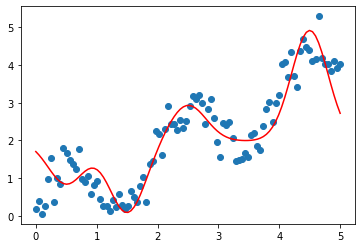

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.14372667 -1.90294994  0.94783908 -0.00531681  2.92903789]
interception:  1.991305537173769


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

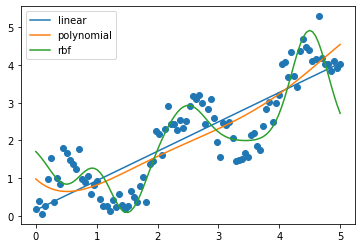

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5134696010002426


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4609479527822453


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.3048158275003814
